# **The Great War, 1964 by Rene Magritte**

![The great war](https://raw.githubusercontent.com/asyaf/magritte/master/images/the-great-war.jpg)

## Imports

In [1]:
import os
import sys
venv_path = os.environ['VIRTUAL_ENV']
sys.path.append(os.path.join(os.environ['VIRTUAL_ENV'], "lib\site-packages"))

In [2]:
import cv2
import face_recognition
import matplotlib.pyplot as plt
import numpy as np

from utils import load_image, alpha_blend, display_image, \
    display_images, resize_image

%matplotlib inline

## Load images

In [3]:
IMG_PATH = "..\images"
BACK_IMG = "bride.jpg"
FRONT_IMG = "purple-flowers.png"
BACK_IMG_PATH = os.path.join(IMG_PATH, BACK_IMG)
FRONT_IMG_PATH = os.path.join(IMG_PATH, FRONT_IMG)

ALT_BACK_IMG = "brides.jpg"
ALT_BACK_IMG_PATH = os.path.join(IMG_PATH, ALT_BACK_IMG)

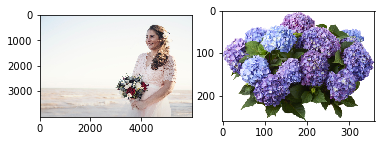

In [4]:
back_img = load_image(BACK_IMG_PATH)
front_img = load_image(FRONT_IMG_PATH, use_alpha=True)  

img_list = [back_img, front_img]
display_images(img_list)

## Run face recognition

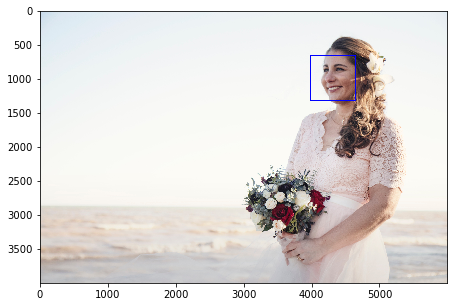

In [5]:
face_locations = face_recognition.face_locations(back_img)

# draw a box around the face
fig = plt.figure(figsize = (20,5))
ax = fig.add_subplot(111)
boxed_img = back_img.copy()
if len(face_locations) > 0:
    for (top, right, bottom, left) in face_locations:
        cv2.rectangle(boxed_img, (left, top),(right, bottom), (0, 0, 255), 10)
ax.imshow(boxed_img)
plt.show()

## Combine images

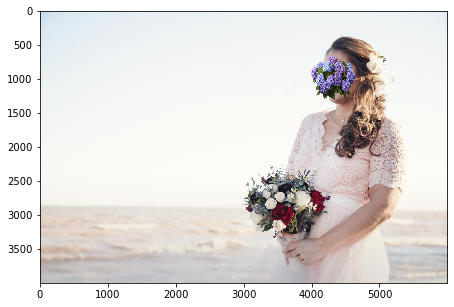

In [6]:
def paste_on_faces(back_img, front_img, face_locations):
    res_img = back_img.copy()
    for (top, right, bottom, left) in face_locations:
        width = right - left
        height = bottom - top
        resized_front_img = resize_image(front_img, width, height)
    
        # extract alpha channel and create a 3-channel image from it
        alpha = resized_front_img[:,:,3]
        alpha_img = cv2.merge([alpha] * 3)
    
        blended = alpha_blend(resized_front_img[:,:,0:3], res_img[top:bottom, left:right], alpha_img)
        res_img[top:bottom, left:right, :] = blended
    return res_img
    
if len(face_locations) > 0: 
    fig2 = plt.figure(figsize = (20,5))
    ax2 = fig2.add_subplot(111)
    res_img = paste_on_faces(back_img, front_img, face_locations)
    plt.imshow(res_img);

## Apply to multiple people in image

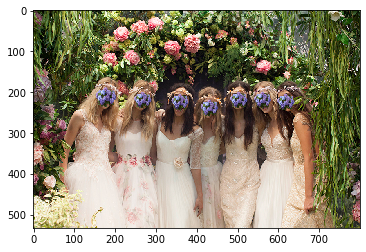

In [7]:
alt_back_img = load_image(ALT_BACK_IMG_PATH)
face_locations = face_recognition.face_locations(alt_back_img)
res_img = paste_on_faces(alt_back_img, front_img, face_locations)
display_image(res_img)